In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rf_fam = pd.read_csv('../data/familia_acolhedora/Censo_SUAS_2023_Familia_Acolhedora_FAM_RH 1.csv', sep=';', encoding='latin1', low_memory=False)

In [3]:
df_rf_fam.head()

,IBGE,NU_IDENTIFICADOR,q48_3,q48_9,q48_10,q48_11,q48_12,q48_13,IBGE7,UF,...,d48_10bin1_sum,d48_10bin2_sum,d48_10bin3_sum,d48_10bin4_sum,d48_10bin5_sum,d48_11bin1_sum,d48_11bin2_sum,d48_11bin3_sum,d48_11bin4_sum,nu_familias_acolhedoras
0,25,"2,506E+12",Feminino,Médio Completo,Sem formação profissional,Sem Vínculo,Família Acolhedora,25/09/2023,25,Paraíba,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,12.0,12
1,25,"2,506E+12",Feminino,Superior Completo,Pedagoga(o),Sem Vínculo,Família Acolhedora,19/09/2023,25,Paraíba,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,12.0,12
2,291270,"2,9127E+12",Feminino,Médio Completo,Profissional de nível médio,Outro vínculo não permanente,Família Acolhedora,01/07/2022,2912707,Bahia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5
3,311910,"3,1191E+12",Feminino,Fundamental Completo,Sem formação profissional,Voluntária(o),Família Acolhedora,04/10/2022,3119104,Minas gerais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13
4,330350,"3,3035E+12",Feminino,Médio Completo,Profissional de nível médio,Servidor(a) Estatutário(a),Família Acolhedora,01/04/1998,3303500,Rio de Janeiro,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,5


In [4]:
df_rf_fam['NU_IDENTIFICADOR'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [5]:
rename_cols_rf = {
    'q48_3': 'rf_sexo',
    'q48_9': 'rf_escolaridade',
    'q48_10': 'rf_profissao',
    'q48_11': 'rf_vinculo',
}

In [6]:
df_rf_fam = df_rf_fam.rename(columns=rename_cols_rf)

In [7]:
df_rf_fam.columns

Index(['IBGE', 'NU_IDENTIFICADOR', 'rf_sexo', 'rf_escolaridade',
       'rf_profissao', 'rf_vinculo', 'q48_12', 'q48_13', 'IBGE7', 'UF',
       'Regiao', 'Município', 'areaKm2', 'Pop_total_2022', 'Porte_pop2022',
       'Q_incompleto', 'q7', 'DataCenso', 'DataCenso_2023',
       'd48_2_Faixas_etarias', 'd48_9', 'd48_11', 'd48_9bin1', 'd48_9bin2',
       'd48_9bin3', 'd48_10bin1', 'd48_10bin2', 'd48_10bin3', 'd48_10bin4',
       'd48_10bin5', 'd48_11bin1', 'd48_11bin2', 'd48_11bin3', 'd48_11bin4',
       'd48_9bin1_sum', 'd48_9bin2_sum', 'd48_9bin3_sum', 'd48_10bin1_sum',
       'd48_10bin2_sum', 'd48_10bin3_sum', 'd48_10bin4_sum', 'd48_10bin5_sum',
       'd48_11bin1_sum', 'd48_11bin2_sum', 'd48_11bin3_sum', 'd48_11bin4_sum',
       'nu_familias_acolhedoras'],
      dtype='object')

In [8]:
# Obter a lista de colunas que existem no dataframe
colunas_existentes = [col for col in [
    'q48_12', 'q48_13', 'areaKm2', 'Pop_total_2022', 'IBGE7', 'UF', 'Regiao', 'Município',
    'Porte_pop2022', 'Q_incompleto', 'q7', 'DataCenso', 'DataCenso_2023',
    'd48_2_Faixas_etarias', 'd48_9', 'd48_11', 'd48_9bin1', 'd48_9bin2', 'd48_9bin3',
    'd48_10bin1', 'd48_10bin2', 'd48_10bin3', 'd48_10bin4', 'd48_10bin5',
    'd48_11bin1', 'd48_11bin2', 'd48_11bin3', 'd48_11bin4',
    'd48_9bin1_sum', 'd48_9bin2_sum', 'd48_9bin3_sum', 'd48_10bin1_sum',
    'd48_10bin2_sum', 'd48_10bin3_sum', 'd48_10bin4_sum', 'd48_10bin5_sum',
    'd48_11bin1_sum', 'd48_11bin2_sum', 'd48_11bin3_sum', 'd48_11bin4_sum',
    'nu_familias_acolhedoras'
] if col in df_rf_fam.columns]

# Remover apenas as colunas que existem
df_rf_fam = df_rf_fam.drop(columns=colunas_existentes)

In [18]:
df_rf_fam.shape

(3312, 6)

In [9]:
df_rf_fam.head()

,IBGE,NU_IDENTIFICADOR,rf_sexo,rf_escolaridade,rf_profissao,rf_vinculo
0,25,"2,506E+12",Feminino,Médio Completo,Sem formação profissional,Sem Vínculo
1,25,"2,506E+12",Feminino,Superior Completo,Pedagoga(o),Sem Vínculo
2,291270,"2,9127E+12",Feminino,Médio Completo,Profissional de nível médio,Outro vínculo não permanente
3,311910,"3,1191E+12",Feminino,Fundamental Completo,Sem formação profissional,Voluntária(o)
4,330350,"3,3035E+12",Feminino,Médio Completo,Profissional de nível médio,Servidor(a) Estatutário(a)


In [10]:
df_rf_fam['IBGE'].apply(type).unique()

array([<class 'int'>], dtype=object)

In [13]:
filtro_ibge = df_rf_fam['IBGE'].astype(str).str.len() < 6
df_filtrado_ibge = df_rf_fam[filtro_ibge]
df_filtrado_ibge.shape

In [20]:
df_filtrado_ibge.head()

,IBGE,NU_IDENTIFICADOR,rf_sexo,rf_escolaridade,rf_profissao,rf_vinculo
0,25,"2,506E+12",Feminino,Médio Completo,Sem formação profissional,Sem Vínculo
1,25,"2,506E+12",Feminino,Superior Completo,Pedagoga(o),Sem Vínculo
151,17,"1,721E+12",Masculino,Médio Completo,Profissional de nível médio,Sem Vínculo
152,17,"1,721E+12",Feminino,Fundamental Completo,Sem formação profissional,Sem Vínculo
153,17,"1,721E+12",Feminino,Superior Completo,Pedagoga(o),Sem Vínculo


In [22]:
df_rf_fam_munici = df_rf_fam[df_rf_fam['IBGE'].between(100000, 999999)]

In [21]:
# Carregar os dados de município de acordo com o código do IBGE
df_municipios = pd.read_excel('../data/dados_geo/RELATORIO_DTB_BRASIL_MUNICIPIO.xls', header=6, engine='xlrd')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [24]:
# Fazer uma cópia explícita do DataFrame
df_rf_fam_munici = df_rf_fam_munici.copy()

# Padronizar a coluna IBGE no DataFrame para ter seis dígitos
df_rf_fam_munici['IBGE'] = df_rf_fam_munici['IBGE'].astype(str).str.zfill(6)

# Remover o dígito verificador (último dígito) da coluna 'Código Município Completo' no DataFrame 'municipios'
df_municipios['Código Município Completo'] = df_municipios['Código Município Completo'].astype(str).str[:-1]

# Padronizar para seis dígitos
df_municipios['Código Município Completo'] = df_municipios['Código Município Completo'].str.zfill(6)

# Realizar o merge entre os DataFrames
df_rf_fam_municipios = pd.merge(
    df_rf_fam_munici,
    df_municipios[['Nome_UF', 'Código Município Completo', 'Nome_Município']],
    left_on='IBGE',
    right_on='Código Município Completo',
    how='inner'
)

In [25]:
df_rf_fam_municipios.head()

,IBGE,NU_IDENTIFICADOR,rf_sexo,rf_escolaridade,rf_profissao,rf_vinculo,Nome_UF,Código Município Completo,Nome_Município
0,291270,"2,9127E+12",Feminino,Médio Completo,Profissional de nível médio,Outro vínculo não permanente,Bahia,291270,Ibirapitanga
1,311910,"3,1191E+12",Feminino,Fundamental Completo,Sem formação profissional,Voluntária(o),Minas Gerais,311910,Corinto
2,330350,"3,3035E+12",Feminino,Médio Completo,Profissional de nível médio,Servidor(a) Estatutário(a),Rio de Janeiro,330350,Nova Iguaçu
3,351040,"3,5104E+12",Feminino,Superior Completo,Profissional de nível médio,Voluntária(o),São Paulo,351040,Capivari
4,353440,"3,5344E+12",Feminino,Especialização,Advogada(o),Sem Vínculo,São Paulo,353440,Osasco


In [71]:
#df_rf_fam_municipios.to_csv("../data/familia_acolhedora/resp_familiar_tratado.csv", index=False)

In [30]:
df_rf_fam_municipios['Nome_UF'].unique()

array(['Bahia', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Distrito Federal', 'Rondônia', 'Acre',
       'Amazonas', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí',
       'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco',
       'Espírito Santo', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás'], dtype=object)

In [31]:
df_rf_fam_municipios['rf_escolaridade'].unique()

array(['Médio Completo', 'Fundamental Completo', 'Superior Completo',
       'Especialização', 'Superior Incompleto', 'Fundamental Incompleto',
       'Sem Escolaridade', 'Mestrado', 'Médio Incompleto', 'Doutorado'],
      dtype=object)

In [32]:
df_rf_fam_municipios['rf_sexo'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [69]:
df_rf_fam_municipios.groupby('Nome_UF').size()

Nome_UF
Acre                     4
Amapá                    1
Amazonas                38
Bahia                   53
Ceará                   38
Distrito Federal        86
Espírito Santo          45
Goiás                    9
Maranhão                23
Mato Grosso             31
Mato Grosso do Sul      79
Minas Gerais           457
Paraná                 883
Paraíba                 26
Pará                    41
Pernambuco              34
Piauí                   22
Rio Grande do Norte     26
Rio Grande do Sul      218
Rio de Janeiro         191
Rondônia                15
Santa Catarina         467
São Paulo              475
Tocantins                9
dtype: int64

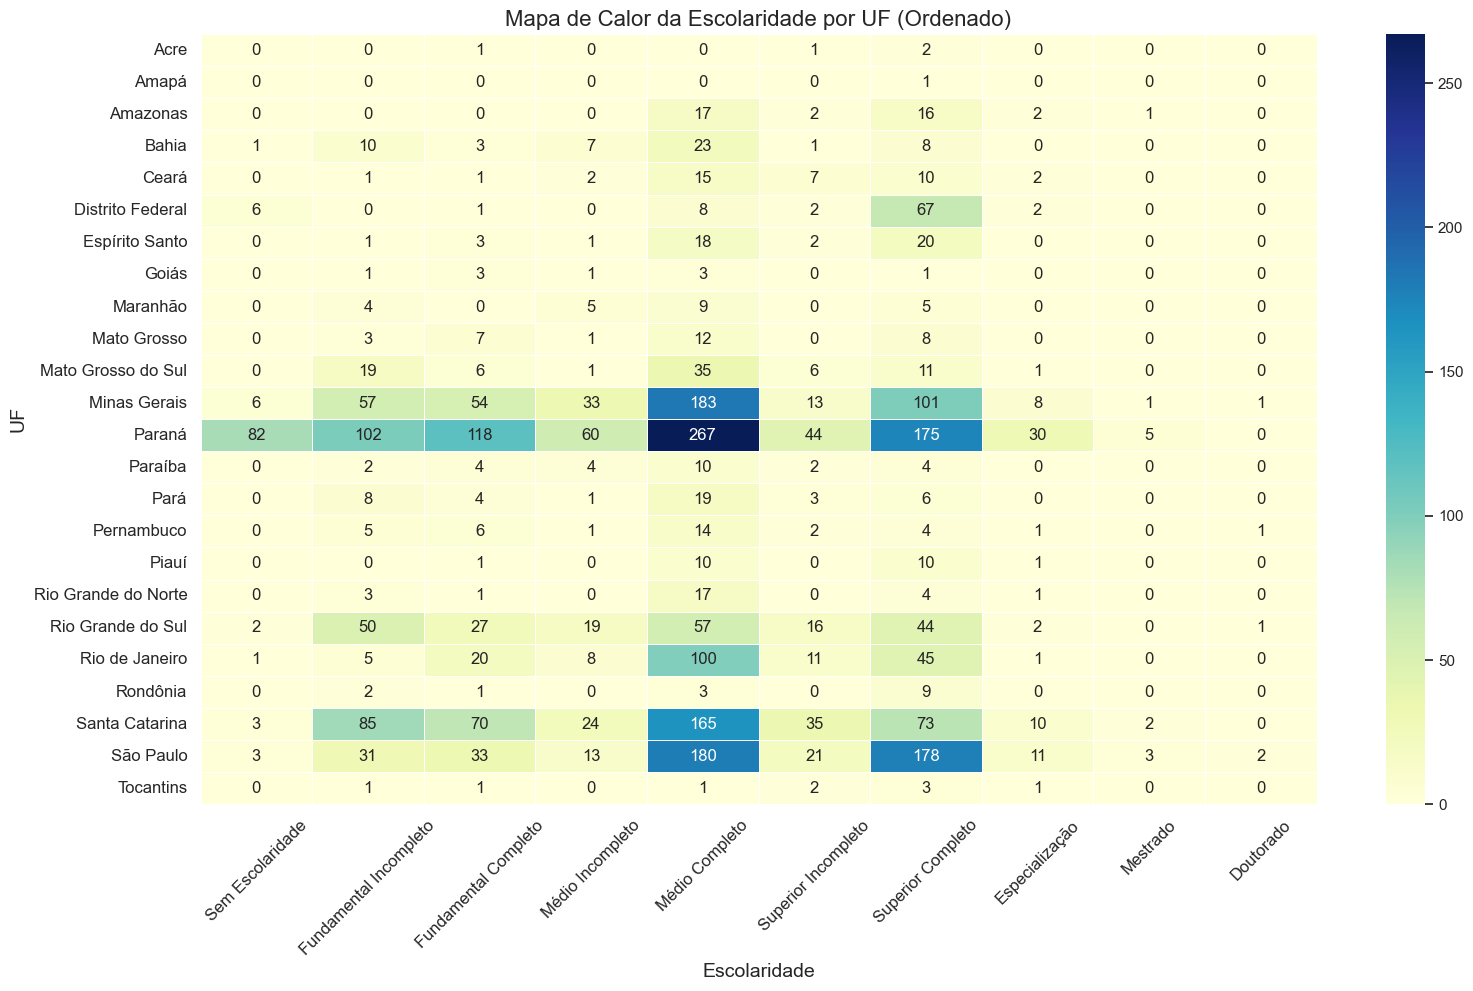

In [62]:
# Definir a ordem personalizada para a coluna 'rf_escolaridade'
ordem_escolaridade = [
    'Sem Escolaridade', 'Fundamental Incompleto', 'Fundamental Completo',
    'Médio Incompleto', 'Médio Completo', 'Superior Incompleto',
    'Superior Completo', 'Especialização', 'Mestrado', 'Doutorado'
]

# Criar a tabela de contingência e ordenar as colunas conforme a ordem definida
escolaridade_por_uf = pd.crosstab(df_rf_fam_municipios['Nome_UF'], df_rf_fam_municipios['rf_escolaridade'])[ordem_escolaridade]

# Criar o heatmap com a nova ordem
plt.figure(figsize=(18, 10))
sns.heatmap(escolaridade_por_uf, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)
plt.title('Mapa de Calor da Escolaridade por UF (Ordenado)', fontsize=16)
plt.xlabel('Escolaridade', fontsize=14)
plt.ylabel('UF', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

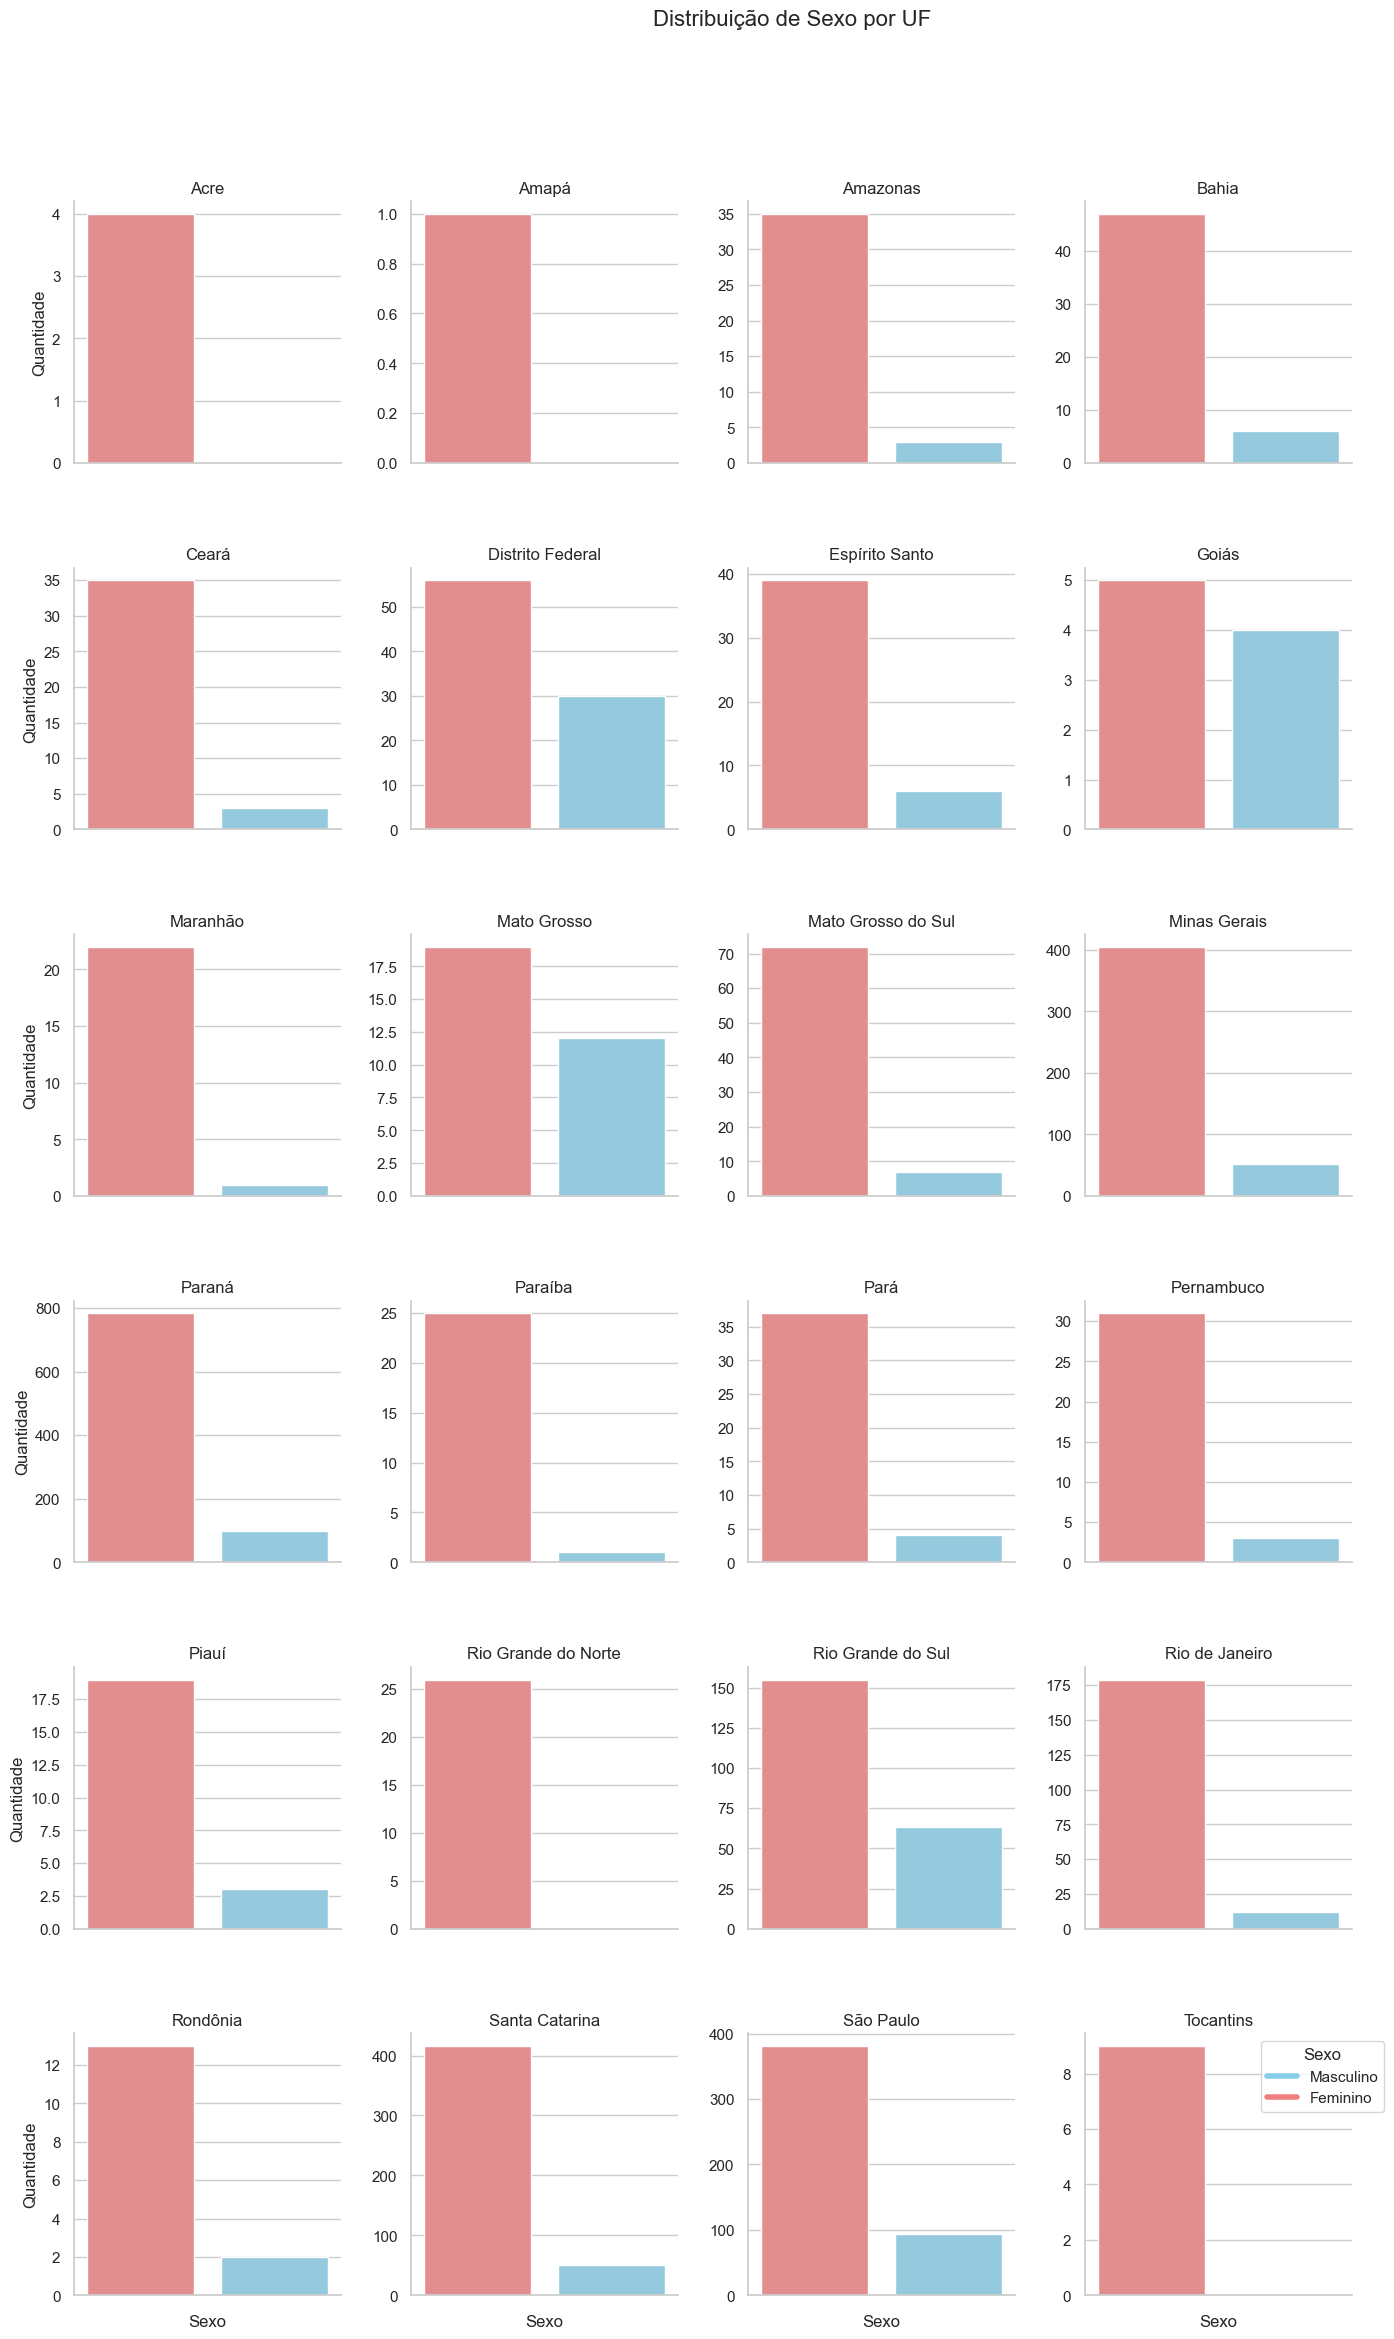

In [68]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Ordenar o dataframe por Nome_UF em ordem alfabética
df = df_rf_fam_municipios.sort_values(by="Nome_UF")

# Definir a paleta de cores manualmente
palette = {"Masculino": "skyblue", "Feminino": "lightcoral"}

# Criar o FacetGrid para o gráfico de sexo
g_sexo = sns.FacetGrid(df, col="Nome_UF", col_wrap=4, height=4, sharey=False, legend_out=True)
g_sexo.map_dataframe(
    sns.countplot,
    x="rf_sexo",
    hue="rf_sexo",
    palette=palette
)

# Ajustar os rótulos do eixo X e título
g_sexo.set_xticklabels(rotation=45, ha="right")
g_sexo.set_axis_labels("Sexo", "Quantidade")

# Criar a legenda manualmente fora do grid
handles = [plt.Line2D([0], [0], color="skyblue", lw=4, label="Masculino"),
           plt.Line2D([0], [0], color="lightcoral", lw=4, label="Feminino")]
plt.legend(handles=handles, title="Sexo", loc='upper right', bbox_to_anchor=(1.15, 1))

# Remover "Nome_UF = ..." e exibir apenas o nome do estado
for ax in g_sexo.axes.flat:
    titulo = ax.get_title().split('=')[1].strip()
    ax.set_title(titulo)

# Ajustar o layout e exibir o gráfico
plt.subplots_adjust(top=0.9, hspace=0.4, right=0.85)
g_sexo.fig.suptitle("Distribuição de Sexo por UF", fontsize=16)
plt.show()